# 図 3.1 の生成

In [ ]:
! pip install POT

In [1]:
import numpy as np
import ot
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# 描画用の色マップ
start = [255, 255, 255]
end = [0, 90, 255]
cdict = {
    'red': [
        (0, 0, start[0]/255),
        (1, end[0]/255, 1),
    ],
    'green' : [
        (0, 0, start[1]/255),
        (1, end[1]/255, 1),
    ],
    'blue' : [
        (0, 0, start[2]/255),
        (1, end[2]/255, 1),
    ]
}
blue = matplotlib.colors.LinearSegmentedColormap('blue', cdict)

In [3]:
# データの生成
a = np.ones(4) / 4
b = np.ones(4) / 4
x = np.array([
    [2.2, 2.1],
    [3.2, 5.3],
    [4.5, 4.4],
    [3.1, 3.8],
])
y = np.array([
    [4.8, 1.9],
    [4.1, 3.3],
    [2.0, 5.5],
    [3.4, 2.5]
])
C = ((x.reshape(-1, 1, 2) - y.reshape(1, -1, 2)) ** 2).sum(2)

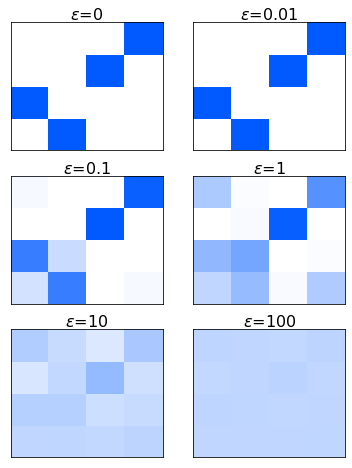

In [4]:
fig = plt.figure(figsize=(6, 8))

ax = fig.add_subplot(3, 2, 1)
P = ot.emd(a, b, C)
ax.pcolor(P[::-1], cmap=blue, vmin=0, vmax=0.25)
ax.set_xticks([])
ax.set_yticks([])
ax.text(2, 4.1, '$\\varepsilon$=0', fontsize=16, ha='center')

for i, v in enumerate([0.01, 0.1, 1, 10, 100]):
    ax = fig.add_subplot(3, 2, i+2)
    P = ot.bregman.sinkhorn_epsilon_scaling(a, b, C, v)
    ax.pcolor(P[::-1], cmap=blue, vmin=0, vmax=0.25)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.text(2, 4.1, '$\\varepsilon$={}'.format(v), fontsize=16, ha='center')